In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


df1 = pd.read_csv('/content/drive/My Drive/NDVI_1YearBefore_Calculation_Results_BufferOnly_With_CloudMasking.csv')
df2 = pd.read_csv('/content/drive/My Drive/NDVI_1YearBefore_Calculation_Results_PolygonOnly_With_CloudMasking.csv')
df3 = pd.read_csv('/content/drive/My Drive/NDVI_Calculation_Results_BufferOnly_With_CloudMasking.csv')
df4 = pd.read_csv('/content/drive/My Drive/NDVI_Calculation_Results_With_CloudMasking.csv')
merged_df = pd.merge(df1, df2, on="created_si", how="outer", suffixes=('', '_duplicate'))
merged_df = pd.merge(merged_df, df3, on="created_si", how="outer", suffixes=('', '_duplicate2'))

merged_df = pd.merge(merged_df, df4, on="created_si", how="outer", suffixes=('', '_duplicate3'))


duplicates = [col for col in merged_df.columns if col.endswith('_duplicate') or col.endswith('_duplicate2') or col.endswith('_duplicate3')]
merged_df.drop(columns=duplicates, inplace=True)

<ipython-input-3-041c24b2ddba>:4: DtypeWarning: Columns (1,3,20,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('/content/drive/My Drive/NDVI_1YearBefore_Calculation_Results_BufferOnly_With_CloudMasking.csv')
<ipython-input-3-041c24b2ddba>:5: DtypeWarning: Columns (1,3,20,22,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/My Drive/NDVI_1YearBefore_Calculation_Results_PolygonOnly_With_CloudMasking.csv')
<ipython-input-3-041c24b2ddba>:6: DtypeWarning: Columns (1,6,23,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('/content/drive/My Drive/NDVI_Calculation_Results_BufferOnly_With_CloudMasking.csv')
<ipython-input-3-041c24b2ddba>:7: DtypeWarning: Columns (1,6,23,25,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df4 = pd.read_csv('/content/drive/My Drive/NDVI_Calculation_Results_With_Cloud

In [1]:
merged_data = merged_df.rename(columns={"NDVI_1YearBefore_PolygonOnly": "NDVI_Polygon_1YearBefore",
    "NDVI_At_Planting": "NDVI_Polygon_At_Planting",
    "NDVI_1YearAfter": "NDVI_Polygon_1YearAfter",
    "NDVI_2YearsAfter": "NDVI_Polygon_2YearsAfter",
    "NDVI_5YearsAfter": "NDVI_Polygon_5YearsAfter",
    "NDVI_1YearBefore_BufferOnly": "NDVI_Buffer_1YearBefore",
    "NDVI_At_Planting_BufferOnly": "NDVI_Buffer_At_Planting",
    "NDVI_1YearAfter_BufferOnly": "NDVI_Buffer_1YearAfter",
    "NDVI_2YearsAfter_BufferOnly": "NDVI_Buffer_2YearsAfter",
    "NDVI_5YearsAfter_BufferOnly": "NDVI_Buffer_5YearsAfter"
})
#Filtering only sites assumed to be bare ground at planting and 1 year before planting according to the NDVI thresold"NDVI less than 0.1"
filtered_data = merged_data[(merged_data['NDVI_Polygon_At_Planting'] < 0.0)&
                            (merged_data['NDVI_Polygon_1YearBefore'] < 0.0)]
filtered_data.info()

NameError: name 'merged_df' is not defined

In [ ]:
columns_to_check = [
    "NDVI_Polygon_1YearBefore",
    "NDVI_Polygon_At_Planting",
    "NDVI_Polygon_1YearAfter",
    "NDVI_Polygon_2YearsAfter",
    "NDVI_Polygon_5YearsAfter",
    "NDVI_Buffer_1YearBefore",
    "NDVI_Buffer_At_Planting",
    "NDVI_Buffer_1YearAfter",
    "NDVI_Buffer_2YearsAfter",
    "NDVI_Buffer_5YearsAfter"
]

# Filtering rows with values across all year
filtered_data = filtered_data.dropna(subset=columns_to_check)
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 1776 to 749021
Data columns (total 45 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   system:index              963 non-null    object 
 1   Intersec_1                580 non-null    object 
 2   NDVI_Buffer_1YearBefore   963 non-null    float64
 3   Nested_in                 1 non-null      object 
 4   Top_Three_                963 non-null    object 
 5   built_area                963 non-null    float64
 6   country                   962 non-null    object 
 7   created_pr                963 non-null    object 
 8   created_si                963 non-null    object 
 9   cropland g                963 non-null    float64
 10  cropland l                963 non-null    float64
 11  descriptio                962 non-null    object 
 12  geometry_r                963 non-null    object 
 13  host_name                 963 non-null    object 
 14  intersect

In [ ]:
filtered_data.describe()

,NDVI_Buffer_1YearBefore,built_area,cropland g,cropland l,intersecti,loss_pos_1,loss_post_,loss_pre_5,permanent,short vege,...,trees_plan,NDVI_Polygon_1YearBefore,NDVI_Buffer_1YearAfter,NDVI_Buffer_2YearsAfter,NDVI_Buffer_5YearsAfter,NDVI_Buffer_At_Planting,NDVI_Polygon_1YearAfter,NDVI_Polygon_2YearsAfter,NDVI_Polygon_5YearsAfter,NDVI_Polygon_At_Planting
count,963.000000,963.000000,963.000000,963.000000,963.000000,962.000000,962.000000,962.000000,963.000000,963.000000,...,1.0,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000,963.000000
mean,-0.035503,0.000187,0.000001,0.000743,0.005192,0.000042,0.000030,0.000186,0.003633,0.000064,...,400.0,-0.105622,0.235166,0.172047,0.283403,0.044717,0.211765,0.170743,0.303234,-0.050429
std,0.157927,0.005304,0.000021,0.004083,0.071906,0.000884,0.000832,0.005511,0.058592,0.000738,...,NaN,0.134992,0.171537,0.190477,0.209272,0.159914,0.185931,0.214914,0.225744,0.135153
min,-0.359043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.0,-0.357371,-0.314278,-0.333356,-0.290017,-0.485737,-0.365648,-0.345531,-0.410505,-0.497160
25%,-0.162443,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.0,-0.223143,0.093660,0.073188,0.113468,-0.021038,0.073523,0.038017,0.102055,-0.136986
50%,-0.038980,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.0,-0.125919,0.262609,0.159178,0.266557,0.063057,0.203473,0.131941,0.326501,0.000118
75%,0.077686,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,400.0,0.040945,0.373291,0.308334,0.481915,0.134822,0.368786,0.339141,0.508236,0.054685
max,0.614681,0.164581,0.000391,0.056409,1.000000,0.023462,0.025789,0.170900,1.648153,0.020785,...,400.0,0.099807,0.607399,0.560986,0.630375,0.614769,0.652692,0.731760,0.714281,0.099944


In [ ]:
# Calculating exact NDVI differences
filtered_data['Diff_AtPlanting_from_1YearBefore'] = filtered_data.apply(
    lambda row: np.nan if pd.isnull(row['NDVI_Polygon_1YearBefore']) or pd.isnull(row['NDVI_Polygon_At_Planting'])
    else row['NDVI_Polygon_At_Planting'] - row['NDVI_Polygon_1YearBefore'], axis=1)

filtered_data['Diff_1Year_NDVI'] = filtered_data.apply(
    lambda row: np.nan if pd.isnull(row['NDVI_Polygon_1YearAfter']) or pd.isnull(row['NDVI_Polygon_At_Planting'])
    else row['NDVI_Polygon_1YearAfter'] - row['NDVI_Polygon_At_Planting'], axis=1)

filtered_data['Diff_2Years_NDVI'] = filtered_data.apply(
    lambda row: np.nan if pd.isnull(row['NDVI_Polygon_2YearsAfter']) or pd.isnull(row['NDVI_Polygon_At_Planting'])
    else row['NDVI_Polygon_2YearsAfter'] - row['NDVI_Polygon_At_Planting'], axis=1)

filtered_data['Diff_5Years_NDVI'] = filtered_data.apply(
    lambda row: np.nan if pd.isnull(row['NDVI_Polygon_5YearsAfter']) or pd.isnull(row['NDVI_Polygon_At_Planting'])
    else row['NDVI_Polygon_5YearsAfter'] - row['NDVI_Polygon_At_Planting'], axis=1)


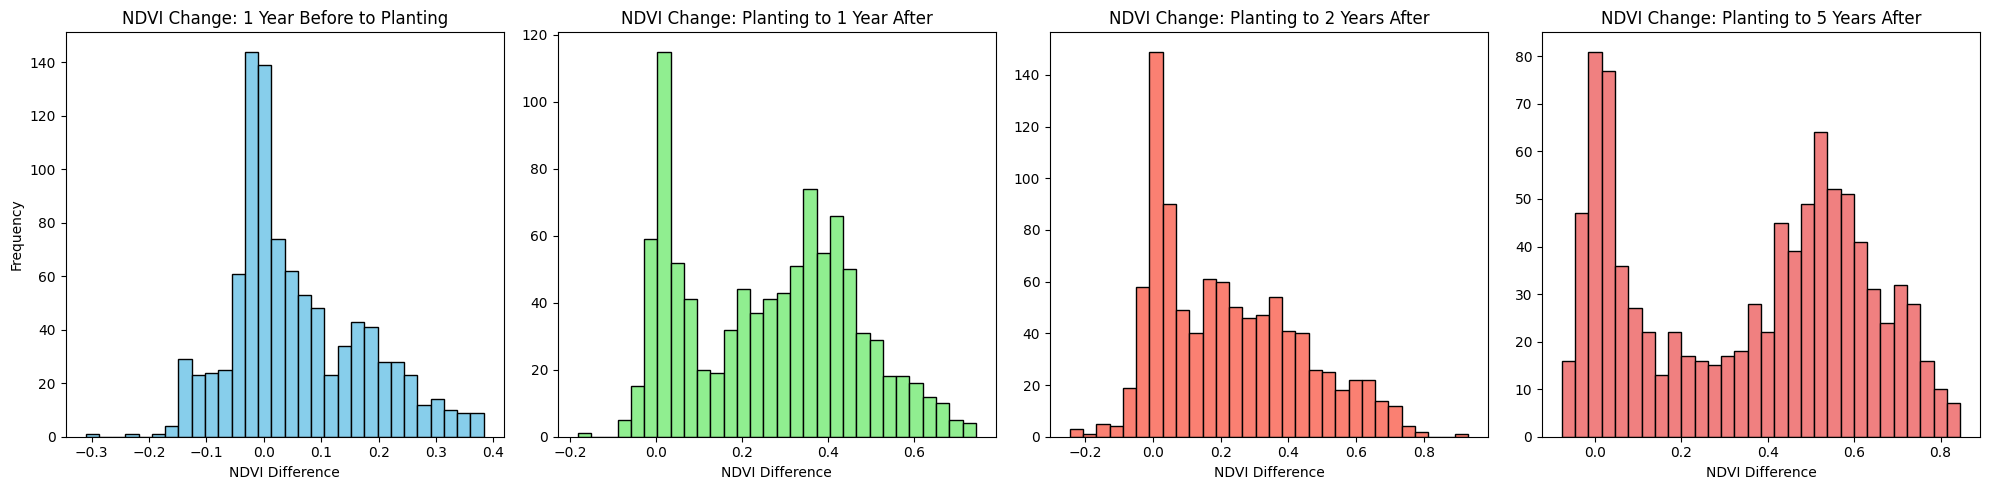

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plotting histograms for each time difference NDVI
axes[0].hist(filtered_data['Diff_AtPlanting_from_1YearBefore'].dropna(), bins=30, color='skyblue', edgecolor='black')
axes[0].set_title('NDVI Change: 1 Year Before to Planting')
axes[0].set_xlabel('NDVI Difference')
axes[0].set_ylabel('Frequency')

axes[1].hist(filtered_data['Diff_1Year_NDVI'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axes[1].set_title('NDVI Change: Planting to 1 Year After')
axes[1].set_xlabel('NDVI Difference')

axes[2].hist(filtered_data['Diff_2Years_NDVI'].dropna(), bins=30, color='salmon', edgecolor='black')
axes[2].set_title('NDVI Change: Planting to 2 Years After')
axes[2].set_xlabel('NDVI Difference')

axes[3].hist(filtered_data['Diff_5Years_NDVI'].dropna(), bins=30, color='lightcoral', edgecolor='black')
axes[3].set_title('NDVI Change: Planting to 5 Years After')
axes[3].set_xlabel('NDVI Difference')

plt.tight_layout()
plt.show()


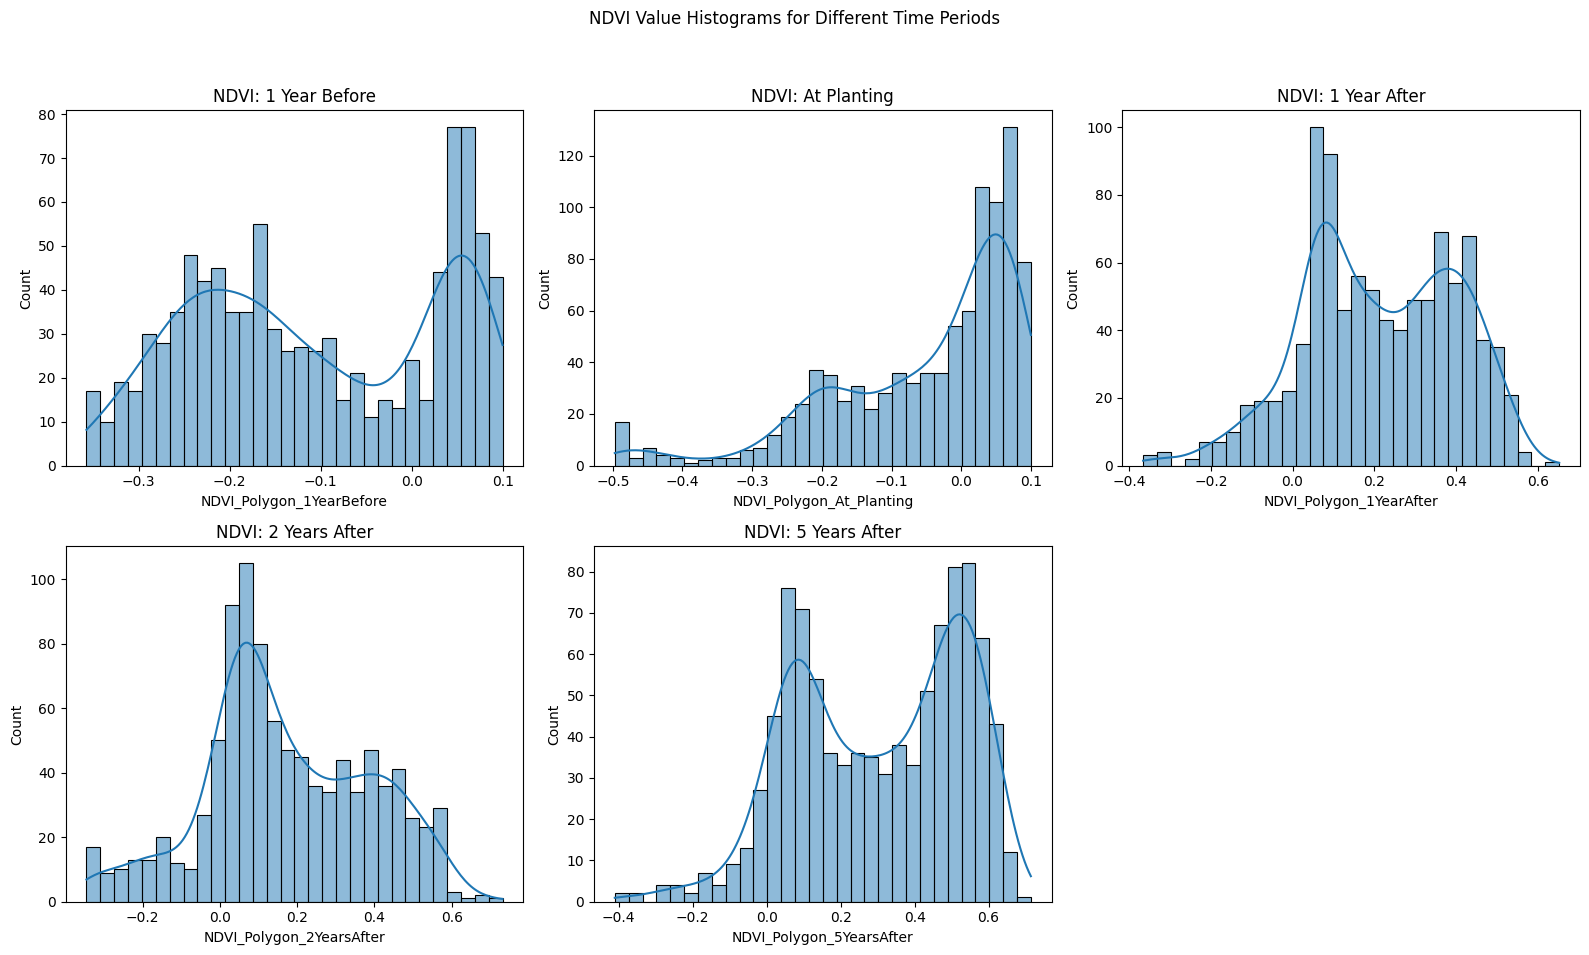

In [ ]:



fig, axes = plt.subplots(2, 3, figsize=(16, 10))
fig.suptitle('NDVI Value Histograms for Different Time Periods')

sns.histplot(filtered_data['NDVI_Polygon_1YearBefore'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('NDVI: 1 Year Before')

sns.histplot(filtered_data['NDVI_Polygon_At_Planting'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('NDVI: At Planting')

sns.histplot(filtered_data['NDVI_Polygon_1YearAfter'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('NDVI: 1 Year After')

sns.histplot(filtered_data['NDVI_Polygon_2YearsAfter'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('NDVI: 2 Years After')

sns.histplot(filtered_data['NDVI_Polygon_5YearsAfter'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('NDVI: 5 Years After')


axes[1, 2].axis('off')


plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


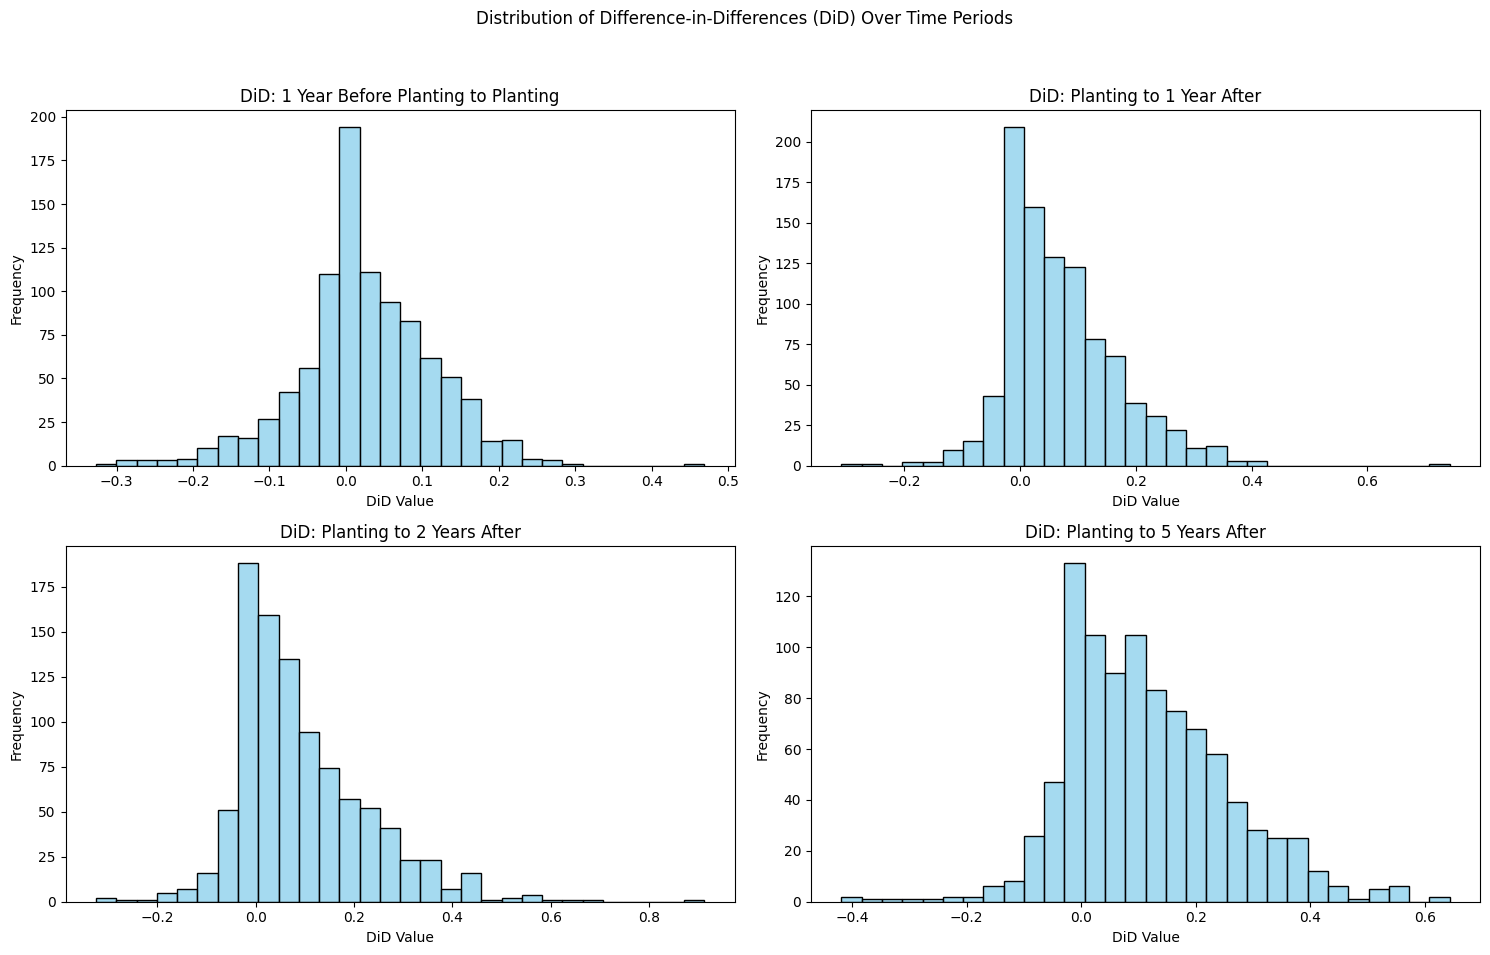

In [ ]:


merged_data = filtered_data
for period in ["1YearBefore", "1YearAfter", "2YearsAfter", "5YearsAfter"]:
    # Calculating changes for Polygon data
    merged_data[f"NDVI_Polygon_Change_{period}"] = (
        merged_data[f"NDVI_Polygon_{period}"] - merged_data["NDVI_Polygon_At_Planting"]
    )

    # Calculating changes for Buffer data
    merged_data[f"NDVI_Buffer_Change_{period}"] = (
        merged_data[f"NDVI_Buffer_{period}"] - merged_data["NDVI_Buffer_At_Planting"]
    )


filtered_data = merged_data.dropna(subset=[
    "NDVI_Polygon_Change_1YearBefore", "NDVI_Buffer_Change_1YearBefore",
    "NDVI_Polygon_Change_1YearAfter", "NDVI_Buffer_Change_1YearAfter",
    "NDVI_Polygon_Change_2YearsAfter", "NDVI_Buffer_Change_2YearsAfter",
    "NDVI_Polygon_Change_5YearsAfter", "NDVI_Buffer_Change_5YearsAfter"
])

# Calculate DiD for each time period and store as columns
filtered_data["DiD_1YearBefore"] = filtered_data["NDVI_Polygon_Change_1YearBefore"] - filtered_data["NDVI_Buffer_Change_1YearBefore"]
filtered_data["DiD_1YearAfter"] = filtered_data["NDVI_Polygon_Change_1YearAfter"] - filtered_data["NDVI_Buffer_Change_1YearAfter"]
filtered_data["DiD_2YearsAfter"] = filtered_data["NDVI_Polygon_Change_2YearsAfter"] - filtered_data["NDVI_Buffer_Change_2YearsAfter"]
filtered_data["DiD_5YearsAfter"] = filtered_data["NDVI_Polygon_Change_5YearsAfter"] - filtered_data["NDVI_Buffer_Change_5YearsAfter"]

# Reshaping DiD columns to long format for plotting
long_did_data = pd.melt(
    filtered_data,
    value_vars=["DiD_1YearBefore", "DiD_1YearAfter", "DiD_2YearsAfter", "DiD_5YearsAfter"],
    var_name="Time_Period",
    value_name="DiD_Value"
)

# Plotting histograms for each DiD distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle("Distribution of Difference-in-Differences (DiD) Over Time Periods")


time_period_titles = {
    "DiD_1YearBefore": "DiD: 1 Year Before Planting to Planting",
    "DiD_1YearAfter": "DiD: Planting to 1 Year After",
    "DiD_2YearsAfter": "DiD: Planting to 2 Years After",
    "DiD_5YearsAfter": "DiD: Planting to 5 Years After"
}


for ax, (time_period, title) in zip(axes.flat, time_period_titles.items()):
    sns.histplot(
        data=long_did_data[long_did_data["Time_Period"] == time_period],
        x="DiD_Value",
        bins=30,
        color='skyblue',
        edgecolor='black',
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('DiD Value')
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [ ]:
from scipy import stats


for period in ["DiD_1YearBefore", "DiD_1YearAfter", "DiD_2YearsAfter", "DiD_5YearsAfter"]:
    result = stats.ttest_1samp(filtered_data[period].dropna(), 0)
    print(f"{period} - t-statistic: {result.statistic}, p-value: {result.pvalue}")

DiD_1YearBefore - t-statistic: 8.725741812257668, p-value: 1.1493315980058128e-17
DiD_1YearAfter - t-statistic: 22.87258141047904, p-value: 8.336260331330465e-93
DiD_2YearsAfter - t-statistic: 21.787316505048466, p-value: 7.341674671463232e-86
DiD_5YearsAfter - t-statistic: 25.493549949072356, p-value: 6.048806848033079e-110


In [ ]:
# Selecting specific columns to filter for polygon area or treatment experiment
treat_df = filtered_data[['NDVI_Polygon_At_Planting', 'NDVI_Polygon_1YearAfter', 'NDVI_Polygon_2YearsAfter','NDVI_Polygon_5YearsAfter']]
treat_df['state'] = 1
treat_df=treat_df.rename(columns={

    "NDVI_Polygon_At_Planting": "NDVI_At_Planting",
    "NDVI_Polygon_1YearAfter": "NDVI_1YearAfter",
    "NDVI_Polygon_2YearsAfter": "NDVI_2YearsAfter",
    "NDVI_Polygon_5YearsAfter": "NDVI_5YearsAfter"
})
treat_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 1776 to 749021
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDVI_At_Planting  963 non-null    float64
 1   NDVI_1YearAfter   963 non-null    float64
 2   NDVI_2YearsAfter  963 non-null    float64
 3   NDVI_5YearsAfter  963 non-null    float64
 4   state             963 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 45.1 KB


<ipython-input-14-925e22dfaa66>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  treat_df['state'] = 1


In [ ]:
# Selecting specific columns to filter for the buffer region/control experiment
cont_df = filtered_data[['NDVI_Buffer_At_Planting', 'NDVI_Buffer_1YearAfter', 'NDVI_Buffer_2YearsAfter','NDVI_Buffer_5YearsAfter']]
cont_df['state'] = 0
cont_df=cont_df.rename(columns={

    "NDVI_Buffer_At_Planting": "NDVI_At_Planting",
    "NDVI_Buffer_1YearAfter": "NDVI_1YearAfter",
    "NDVI_Buffer_2YearsAfter": "NDVI_2YearsAfter",
    "NDVI_Buffer_5YearsAfter": "NDVI_5YearsAfter"
})
cont_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 963 entries, 1776 to 749021
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDVI_At_Planting  963 non-null    float64
 1   NDVI_1YearAfter   963 non-null    float64
 2   NDVI_2YearsAfter  963 non-null    float64
 3   NDVI_5YearsAfter  963 non-null    float64
 4   state             963 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 45.1 KB


<ipython-input-16-61655f4db5a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cont_df['state'] = 0


In [ ]:
Year1 = pd.concat([treat_df, cont_df])

Year1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1926 entries, 1776 to 749021
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NDVI_At_Planting  1926 non-null   float64
 1   NDVI_1YearAfter   1926 non-null   float64
 2   NDVI_2YearsAfter  1926 non-null   float64
 3   NDVI_5YearsAfter  1926 non-null   float64
 4   state             1926 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 90.3 KB


# Year 1 DID


In [ ]:

filtered_df = Year1[['state', 'NDVI_At_Planting', 'NDVI_1YearAfter']]

In [ ]:
filtered_df.groupby('state').mean()

,NDVI_At_Planting,NDVI_1YearAfter
state,,
0,0.044717,0.235166
1,-0.050429,0.211765


In [ ]:


mean_NDVI_cont_before = filtered_df.groupby('state').mean().iloc[0, 0]
mean_NDVI_cont_after = filtered_df.groupby('state').mean().iloc[0, 1]
mean_NDVI_treat_before = filtered_df.groupby('state').mean().iloc[1, 0]
mean_NDVI_treat_after = filtered_df.groupby('state').mean().iloc[1, 1]

print(f'mean control NDVI before: {mean_NDVI_cont_before:.2f}')
print(f'mean control NDVI after: {mean_NDVI_cont_after:.2f}')
print(f'mean treatment NDVI before: {mean_NDVI_treat_before:.2f}')
print(f'mean treatment NDVI after: {mean_NDVI_treat_after:.2f}')

pa_diff = mean_NDVI_cont_after - mean_NDVI_cont_before
nj_diff = mean_NDVI_treat_after - mean_NDVI_treat_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean control NDVI before: 0.04
mean control NDVI after: 0.24
mean treatment NDVI before: -0.05
mean treatment NDVI after: 0.21
DID in mean employment is 0.07


In [ ]:

df_before = filtered_df[['NDVI_At_Planting', 'state']]
df_before['t'] = 0
df_before.columns = ['NDVI', 'g', 't']


df_after = filtered_df[['NDVI_1YearAfter', 'state']]
df_after['t'] = 1
df_after.columns = ['NDVI', 'g', 't']

In [ ]:
#  regression data creation
df_reg = pd.concat([df_before, df_after])

#  interaction  data
df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,NDVI,g,t,gt
1776,-0.036099,1,0,0
1779,-0.000636,1,0,0
1783,-0.051878,1,0,0
1785,0.010634,1,0,0
3726,-0.178066,1,0,0
...,...,...,...,...
749013,-0.010043,0,1,0
749015,0.087124,0,1,0
749019,-0.022032,0,1,0
749020,-0.145395,0,1,0


OLS regression in DID

In [ ]:

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.NDVI

lr.fit(X, y)
lr.coef_

array([-0.09514593,  0.19044916,  0.07174458])

In [ ]:

from statsmodels.formula.api import ols
ols = ols('NDVI ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.342
Method:                 Least Squares   F-statistic:                     667.1
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:45:01   Log-Likelihood:                 1495.8
No. Observations:                3852   AIC:                            -2984.
Df Residuals:                    3848   BIC:                            -2959.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0447      0.005      8.452      0.0

# Year 2 DID

In [ ]:

filtered_df = Year1[['state', 'NDVI_At_Planting', 'NDVI_2YearsAfter']]

In [ ]:
filtered_df.groupby('state').mean()

,NDVI_At_Planting,NDVI_2YearsAfter
state,,
0,0.044717,0.172047
1,-0.050429,0.170743


In [ ]:


mean_NDVI_cont_before = filtered_df.groupby('state').mean().iloc[0, 0]
mean_NDVI_cont_after = filtered_df.groupby('state').mean().iloc[0, 1]
mean_NDVI_treat_before = filtered_df.groupby('state').mean().iloc[1, 0]
mean_NDVI_treat_after = filtered_df.groupby('state').mean().iloc[1, 1]

print(f'mean control NDVI before: {mean_NDVI_cont_before:.2f}')
print(f'mean control NDVI after: {mean_NDVI_cont_after:.2f}')
print(f'mean treatment NDVI before: {mean_NDVI_treat_before:.2f}')
print(f'mean treatment NDVI after: {mean_NDVI_treat_after:.2f}')

pa_diff = mean_NDVI_cont_after - mean_NDVI_cont_before
nj_diff = mean_NDVI_treat_after - mean_NDVI_treat_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean control NDVI before: 0.04
mean control NDVI after: 0.17
mean treatment NDVI before: -0.05
mean treatment NDVI after: 0.17
DID in mean employment is 0.09


In [ ]:

df_before = filtered_df[['NDVI_At_Planting', 'state']]
df_before['t'] = 0
df_before.columns = ['NDVI', 'g', 't']


df_after = filtered_df[['NDVI_2YearsAfter', 'state']]
df_after['t'] = 1
df_after.columns = ['NDVI', 'g', 't']

In [ ]:

df_reg = pd.concat([df_before, df_after])


df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,NDVI,g,t,gt
1776,-0.036099,1,0,0
1779,-0.000636,1,0,0
1783,-0.051878,1,0,0
1785,0.010634,1,0,0
3726,-0.178066,1,0,0
...,...,...,...,...
749013,-0.012134,0,1,0
749015,0.138829,0,1,0
749019,-0.047060,0,1,0
749020,-0.075747,0,1,0


In [ ]:

lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.NDVI

lr.fit(X, y)
lr.coef_

array([-0.09514593,  0.12733044,  0.09384207])

In [ ]:

ols = ols('NDVI ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.216
Method:                 Least Squares   F-statistic:                     354.7
Date:                Wed, 13 Nov 2024   Prob (F-statistic):          2.31e-203
Time:                        14:48:10   Log-Likelihood:                 1191.2
No. Observations:                3852   AIC:                            -2374.
Df Residuals:                    3848   BIC:                            -2349.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0447      0.006      7.809      0.0

# Year 5 DID

In [ ]:

filtered_df = Year1[['state', 'NDVI_At_Planting', 'NDVI_5YearsAfter']]

In [ ]:
filtered_df.groupby('state').mean()

,NDVI_At_Planting,NDVI_5YearsAfter
state,,
0,0.044717,0.283403
1,-0.050429,0.303234


In [ ]:

mean_NDVI_cont_before = filtered_df.groupby('state').mean().iloc[0, 0]
mean_NDVI_cont_after = filtered_df.groupby('state').mean().iloc[0, 1]
mean_NDVI_treat_before = filtered_df.groupby('state').mean().iloc[1, 0]
mean_NDVI_treat_after = filtered_df.groupby('state').mean().iloc[1, 1]

print(f'mean control NDVI before: {mean_NDVI_cont_before:.2f}')
print(f'mean control NDVI after: {mean_NDVI_cont_after:.2f}')
print(f'mean treatment NDVI before: {mean_NDVI_treat_before:.2f}')
print(f'mean treatment NDVI after: {mean_NDVI_treat_after:.2f}')

pa_diff = mean_NDVI_cont_after - mean_NDVI_cont_before
nj_diff = mean_NDVI_treat_after - mean_NDVI_treat_before
did = nj_diff - pa_diff

print(f'DID in mean employment is {did:.2f}')

mean control NDVI before: 0.04
mean control NDVI after: 0.28
mean treatment NDVI before: -0.05
mean treatment NDVI after: 0.30
DID in mean employment is 0.11


In [ ]:

df_before = filtered_df[['NDVI_At_Planting', 'state']]
df_before['t'] = 0
df_before.columns = ['NDVI', 'g', 't']


df_after = filtered_df[['NDVI_5YearsAfter', 'state']]
df_after['t'] = 1
df_after.columns = ['NDVI', 'g', 't']

In [ ]:

df_reg = pd.concat([df_before, df_after])


df_reg['gt'] = df_reg.g * df_reg.t

df_reg

,NDVI,g,t,gt
1776,-0.036099,1,0,0
1779,-0.000636,1,0,0
1783,-0.051878,1,0,0
1785,0.010634,1,0,0
3726,-0.178066,1,0,0
...,...,...,...,...
749013,0.027810,0,1,0
749015,0.224227,0,1,0
749019,0.012799,0,1,0
749020,0.004211,0,1,0


In [ ]:

lr = LinearRegression()

X = df_reg[['g', 't', 'gt']]
y = df_reg.NDVI

lr.fit(X, y)
lr.coef_

array([-0.09514593,  0.23868583,  0.1149777 ])

In [ ]:
from statsmodels.formula.api import ols
ols = ols('NDVI ~ g + t + gt', data=df_reg).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.400
Method:                 Least Squares   F-statistic:                     856.4
Date:                Wed, 13 Nov 2024   Prob (F-statistic):               0.00
Time:                        14:50:56   Log-Likelihood:                 1012.4
No. Observations:                3852   AIC:                            -2017.
Df Residuals:                    3848   BIC:                            -1992.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0447      0.006      7.455      0.0